<a href="https://colab.research.google.com/github/cabrelharerimana/Netflix-Content-Analysis/blob/main/NetflixContentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/dataset/netflix_titles.csv")

In [ ]:
# Remove Leading/trailing spaces
df["date_added"] = df["date_added"].str.strip()

In [ ]:
#convert to datetime(ignore errors if some dates are missing/invalid)
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

In [ ]:
# Extract year Netflix added the show
df["year_added"] = df["date_added"].dt.year

In [ ]:
# count how many shows/movies added each year
content_trend = df.groupby("year_added")["title"].count()
print(content_trend)

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: title, dtype: int64


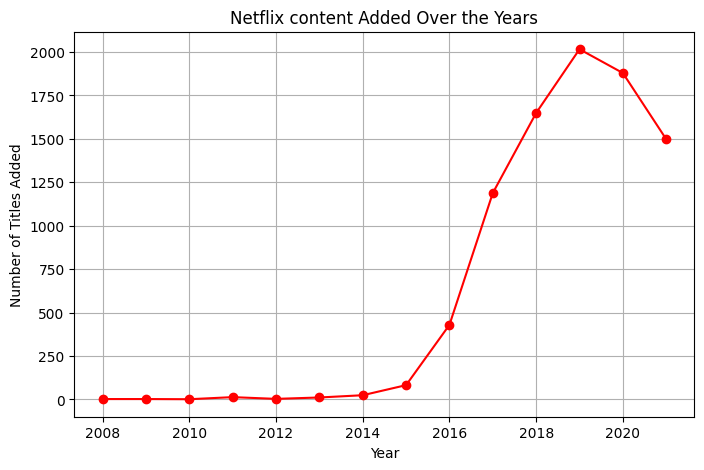

In [ ]:
# plot the trend
plt.figure(figsize=(8,5))
content_trend.plot(kind="line", marker="o", color="red")
plt.title("Netflix content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()

